# Overview
Within this repository are data of simulated household socioeconomics, demographics, and energy usage.  

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
df_households = pd.read_csv("CO_estimates_all_households.zip")
tract_geodf = gpd.read_file("./CO_tract_shapefiles/tract_CO.shp")


# Energy gap
Energy cost gaps (ECG) are the amount of money ($) needed to reduce a household's energy cost burden to 6 percent. We can investigate the total and
average energy cost gaps in tracts across Colorado


(-1178569.8808199996,
 -472527.95478000026,
 -65224.13371500019,
 492272.0300149994)

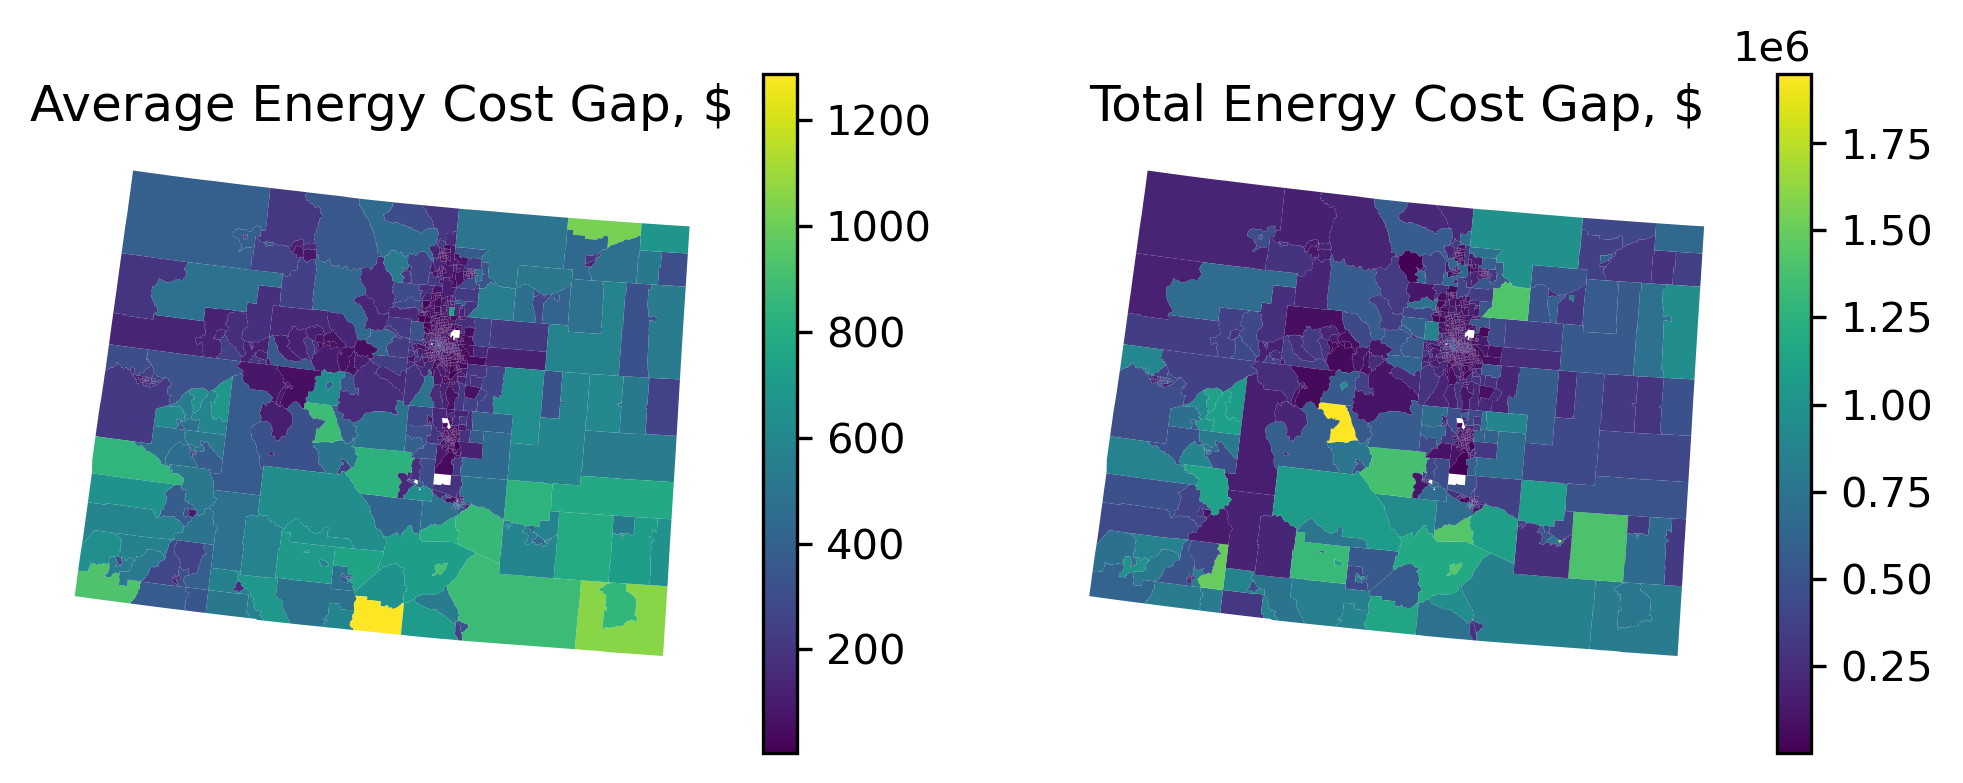

In [2]:
fig,axs = plt.subplots(1,2,figsize = (8,3),dpi=300)
tract_gaps_average = df_households[["GISJOIN","ECG"]].groupby("GISJOIN").mean()
tract_gaps_total = df_households[["GISJOIN","ECG"]].groupby("GISJOIN").sum()
tract_geodf_average = tract_geodf.merge(tract_gaps_average,on="GISJOIN")
tract_geodf_total = tract_geodf.merge(tract_gaps_total,on="GISJOIN")
tract_geodf_average.plot("ECG",legend=True,ax=axs[0])
axs[0].set_title("Average Energy Cost Gap, $"); axs[0].axis('off')
tract_geodf_total.plot("ECG",legend=True,ax=axs[1])
axs[1].set_title("Total Energy Cost Gap, $"); axs[1].axis('off')


# Breakdown by poverty level
Similarly, by looking at only households within poverty brackets defined by federal income limits, we can look at average gaps within each bracket
geospatially.

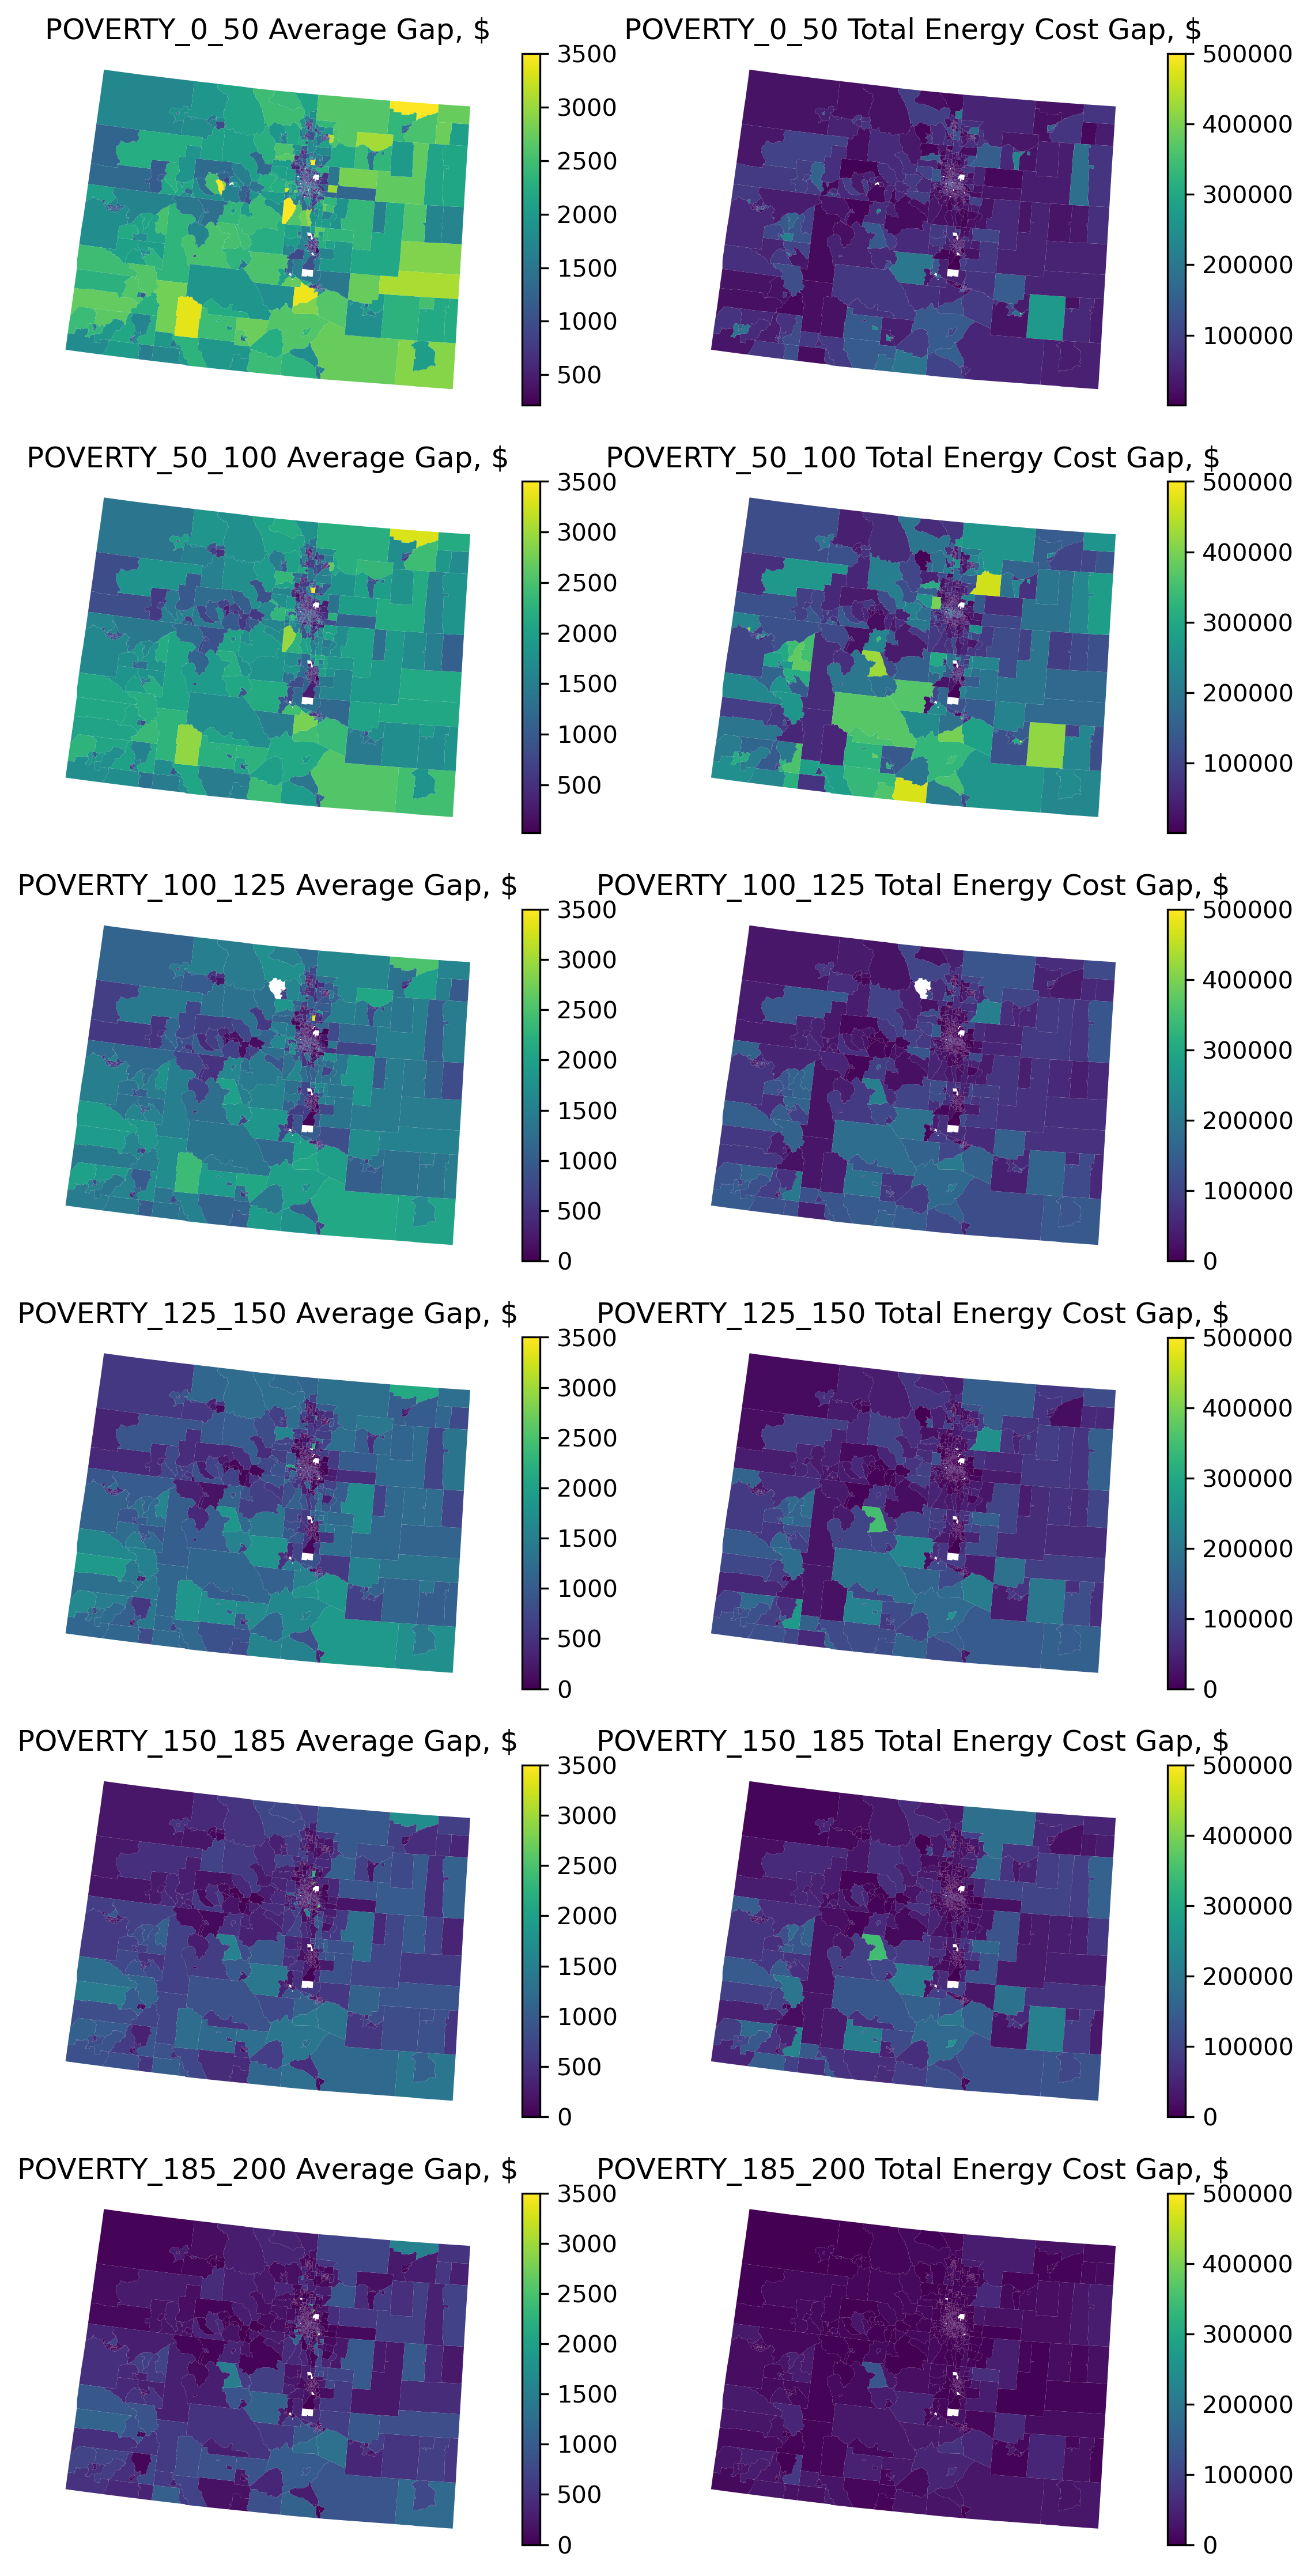

In [3]:
columns_poverty = ["POVERTY_0_50","POVERTY_50_100","POVERTY_100_125","POVERTY_125_150","POVERTY_150_185","POVERTY_185_200"]
avg_max = 3500
total_max = 500000
fig,axs = plt.subplots(6,2,figsize = (8,15),dpi=300)
for (col,plot_row) in zip(columns_poverty,range(len(columns_poverty))):
    tract_gaps_average = df_households.loc[df_households[col],["GISJOIN","ECG"]].groupby("GISJOIN").mean()
    tract_gaps_total = df_households.loc[df_households[col],["GISJOIN","ECG"]].groupby("GISJOIN").sum()
    tract_geodf_average = tract_geodf.merge(tract_gaps_average,on="GISJOIN")
    tract_geodf_total = tract_geodf.merge(tract_gaps_total,on="GISJOIN")
    tract_geodf_average.plot("ECG",legend=True,ax=axs[plot_row,0],vmax = avg_max)
    axs[plot_row,0].set_title(col+" Average Gap, $"); axs[plot_row,0].axis('off')
    tract_geodf_total.plot("ECG",legend=True,ax=axs[plot_row,1],vmax = total_max)
    axs[plot_row,1].set_title(col+" Total Energy Cost Gap, $"); axs[plot_row,1].axis('off')
plt.tight_layout()

# Grouping homes with similar properties
With the household dataset, making analysis across tracts becomes more straightforward. For example, we can look at the total gaps across different
housing types or heating fuel type or ownership type

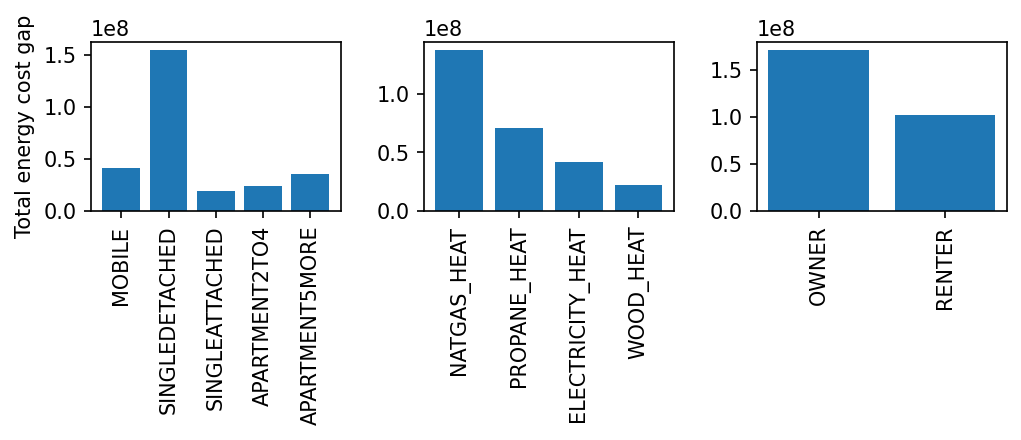

In [5]:
fig,axs = plt.subplots(1,3,figsize = (7,3),dpi=150)

type_columns = ["MOBILE","SINGLEDETACHED","SINGLEATTACHED","APARTMENT2TO4","APARTMENT5MORE"]
fuel_heat_columns = ["NATGAS_HEAT","PROPANE_HEAT","ELECTRICITY_HEAT","WOOD_HEAT"]
owner_columns = ["OWNER","RENTER"]

fuel_heat_gaps = dict()
type_gaps = dict()
owner_gaps = dict()

type_gaps
for type in type_columns:
    type_gaps[type] = df_households.loc[df_households[type],["ECG"]].sum()[0]

for fuel_heat in fuel_heat_columns:
    fuel_heat_gaps[fuel_heat] = df_households.loc[df_households[fuel_heat],["ECG"]].sum()[0]

for owner in owner_columns:
    owner_gaps[owner] = df_households.loc[df_households[owner],["ECG"]].sum()[0]

# np.array(type_gaps).tolist()[0]
# axs[0].bar([1,2,3,4,5],[1,2,3,4,5], align='center')
# axs[0].bar([range(len(type_gaps))],np.array(type_gaps).tolist(), align='center')
axs[0].bar(range(len(type_gaps)), list(type_gaps.values()), align='center')
axs[0].set_xticks(range(len(type_gaps)))
axs[0].set_xticklabels(list(type_gaps.keys()),rotation = 90)
axs[0].set_ylabel("Total energy cost gap")

axs[1].bar(range(len(fuel_heat_gaps)), list(fuel_heat_gaps.values()), align='center')
axs[1].set_xticks(range(len(fuel_heat_gaps)))
axs[1].set_xticklabels(list(fuel_heat_gaps.keys()),rotation = 90)

axs[2].bar(range(len(owner_gaps)), list(owner_gaps.values()), align='center')
axs[2].set_xticks(range(len(owner_gaps)))
axs[2].set_xticklabels(list(owner_gaps.keys()),rotation = 90)
plt.tight_layout()


# Energy cost burden distributions within tracts
We can even investigate how homogeneous variables such as energy cost burdens are within a tract. This shows where homes within a tract have very different incomes, energy use, or both and suggests that in rural areas it may be more problematic to consider only the median energy cost burden. 

(-1178569.8808199996,
 -472527.95478000026,
 -65224.13371500019,
 492272.0300149994)

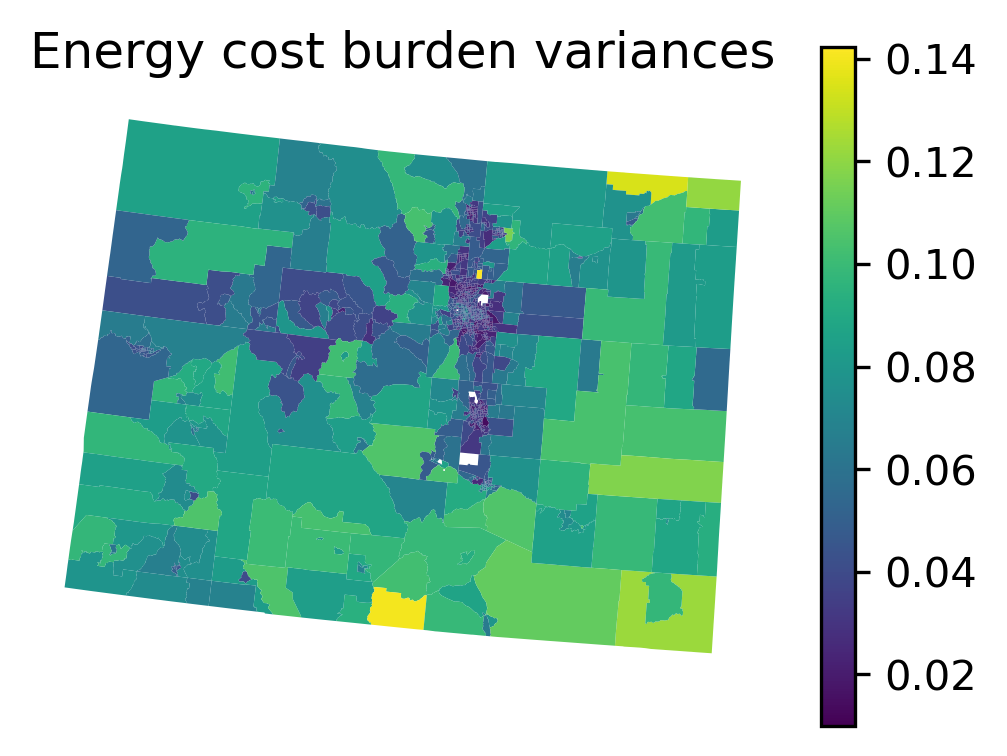

In [7]:
fig,ax = plt.subplots(1,1,figsize = (4,3),dpi=300)
tract_burdens_variance = df_households[["GISJOIN","ECB"]].groupby("GISJOIN").std()
tract_geodf_burdens = tract_geodf.merge(tract_burdens_variance,on="GISJOIN")
tract_geodf_burdens.plot("ECB",legend=True,ax=ax)
ax.set_title("Energy cost burden variances"); ax.axis('off')

# Analysis of energy cost by use
We can also separate energy costs by end use.

(-1178569.8808199996,
 -472527.95478000026,
 -65224.13371500019,
 492272.0300149994)

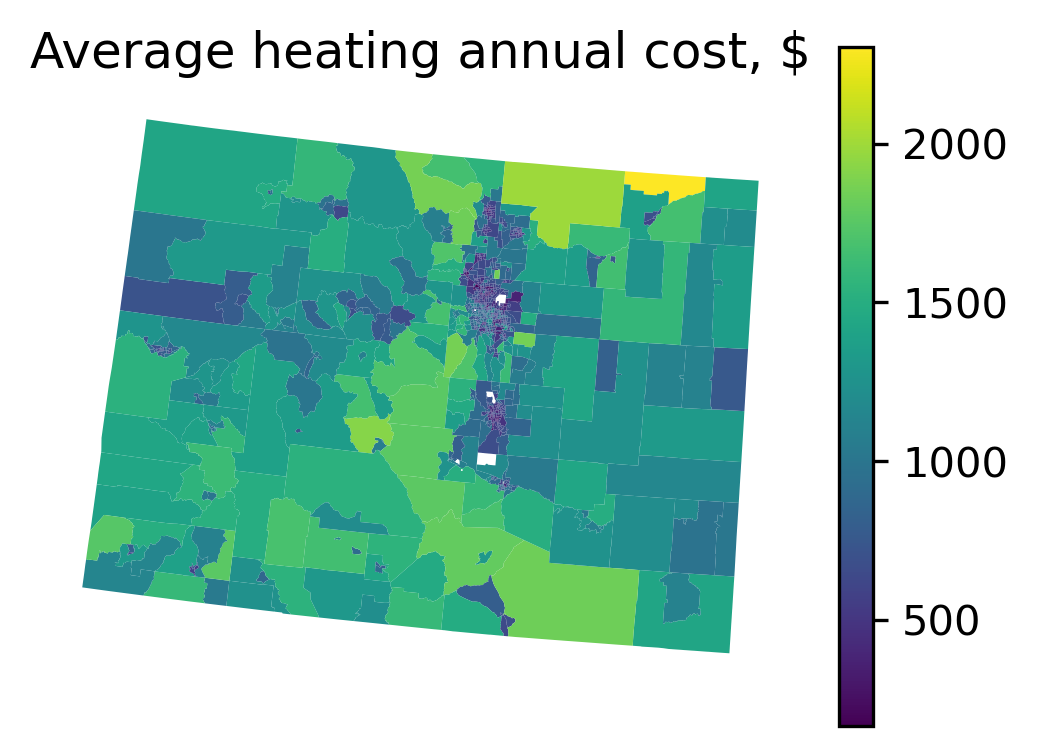

In [13]:
df_households["HEAT_COST"] = df_households["MMBTU_HEAT_EL"]*df_households["PRICE_MMBTU_ELEC"] + \
                                    df_households["MMBTU_HEAT_NG"]*df_households["PRICE_MMBTU_GAS"] + \
                                    df_households["MMBTU_HEAT_LP"]*df_households["PRICE_MMBTU_LPG"] + \
                                    df_households["MMBTU_WOOD"]*df_households["PRICE_MMBTU_WOOD"]

fig,ax = plt.subplots(1,1,figsize = (4,3),dpi=300)
tract_heat_cost = df_households[["GISJOIN","HEAT_COST"]].groupby("GISJOIN").mean()
tract_geodf_heat_cost = tract_geodf.merge(tract_heat_cost,on="GISJOIN")
tract_geodf_heat_cost.plot("HEAT_COST",legend=True,ax=ax)
ax.set_title("Average heating annual cost, $"); ax.axis('off')